In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns
import os

from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 

In [2]:
dfg = pd.read_csv('Data.csv')
dfe = dfg[dfg['genre'] != 'Jazz']
df = dfg[dfg['genre'] == 'Jazz']

In [3]:
df.describe()

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,...,duration_ms_zscore,energy_zscore,instrumentalness_zscore,liveness_zscore,loudness_zscore,speechiness_zscore,tempo_zscore,valence_zscore,lognorm_duration_zscore,Count_zscore
count,9441.000000,9441.000000,9441.000000,9441.000000,9.441000e+03,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,...,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000,9441.000000
mean,184760.716661,40.824383,0.499606,0.585638,2.656453e+05,0.472776,0.358009,0.173355,-11.210457,0.072304,...,0.248855,-0.415200,0.754666,-0.209584,-0.312373,-0.269179,-0.183620,0.251242,0.273813,-0.442640
std,7681.134846,9.588840,0.337637,0.158903,1.230979e+05,0.237807,0.383488,0.151554,4.622718,0.079359,...,1.055018,0.912621,1.311313,0.769399,0.778107,0.426059,0.955425,0.983639,1.082129,0.220076
min,177882.000000,0.000000,0.000001,0.059600,1.969300e+04,0.002110,0.000000,0.014600,-39.198000,0.022600,...,-1.859094,-2.221451,-0.469522,-1.015542,-5.023302,-0.536027,-2.691359,-1.637431,-6.283567,-0.617885
25%,180242.000000,35.000000,0.163000,0.475000,1.899580e+05,0.288000,0.000204,0.093800,-13.687000,0.035200,...,-0.399827,-1.124305,-0.468824,-0.613464,-0.729230,-0.468381,-0.891206,-0.563024,-0.377274,-0.589925
50%,182602.000000,40.000000,0.525000,0.602000,2.486270e+05,0.473000,0.133000,0.115000,-10.353000,0.043600,...,0.102999,-0.414339,-0.014737,-0.505838,-0.168043,-0.423283,-0.389128,0.267056,0.324096,-0.522820
75%,184962.000000,46.000000,0.823000,0.705000,3.136930e+05,0.657000,0.801000,0.184000,-7.890000,0.066500,...,0.660651,0.291789,2.269446,-0.155543,0.246535,-0.300339,0.340186,1.046236,0.929858,-0.383018
max,205075.000000,79.000000,0.996000,0.987000,4.497994e+06,0.999000,0.985000,0.986000,-1.002000,0.939000,...,36.522466,1.604265,2.898623,3.916002,1.405939,4.383878,3.986174,2.115161,7.869198,0.595596


In [4]:
cols = df.columns

allpop = dfe[dfe.popular == 'popular']
pop = df[df.popular == 'popular']
nonpop = df[df.popular == 'not-popular']


print(df.corr())


                         Unnamed: 0  popularity  acousticness  danceability  \
Unnamed: 0                 1.000000   -0.446043     -0.038029     -0.006003   
popularity                -0.446043    1.000000      0.046487      0.027486   
acousticness              -0.038029    0.046487      1.000000     -0.309675   
danceability              -0.006003    0.027486     -0.309675      1.000000   
duration_ms                0.043442   -0.004490     -0.084349     -0.177656   
energy                     0.077724   -0.073045     -0.702245      0.276701   
instrumentalness           0.015570   -0.136043     -0.042548      0.020909   
liveness                   0.042065   -0.051384     -0.035814     -0.087178   
loudness                   0.040829   -0.021231     -0.570674      0.316679   
speechiness                0.014827   -0.044788     -0.131462      0.221828   
tempo                      0.024140   -0.012614     -0.080383     -0.087423   
valence                    0.043635   -0.061247     

Let's look at energy, instrumentalness, count, and liveness.

<ErrorbarContainer object of 3 artists>

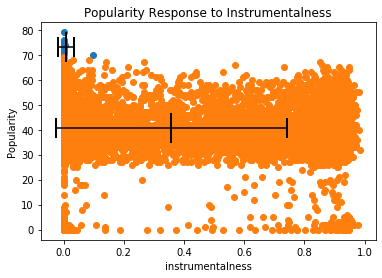

In [5]:
plt.scatter(pop.instrumentalness, pop.popularity)
plt.scatter(nonpop.instrumentalness, nonpop.popularity)
plt.xlabel("instrumentalness")
plt.ylabel("Popularity")
plt.title("Popularity Response to Instrumentalness")

plt.errorbar(np.mean(pop.instrumentalness),np.mean(pop.popularity),xerr=np.std(pop.instrumentalness),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')
plt.errorbar(np.mean(nonpop.instrumentalness),np.mean(nonpop.popularity),xerr=np.std(nonpop.instrumentalness),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')

<ErrorbarContainer object of 3 artists>

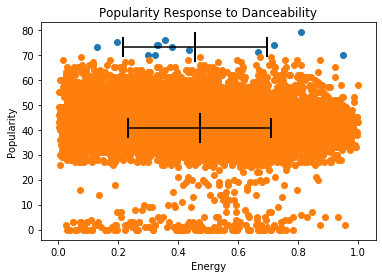

In [6]:
plt.scatter(pop.energy, pop.popularity)
plt.scatter(nonpop.energy, nonpop.popularity)
plt.xlabel("Energy")
plt.ylabel("Popularity")
plt.title("Popularity Response to Danceability")

plt.errorbar(np.mean(pop.energy),np.mean(pop.popularity),xerr=np.std(pop.energy),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')
plt.errorbar(np.mean(nonpop.energy),np.mean(nonpop.popularity),xerr=np.std(nonpop.energy),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')

<ErrorbarContainer object of 3 artists>

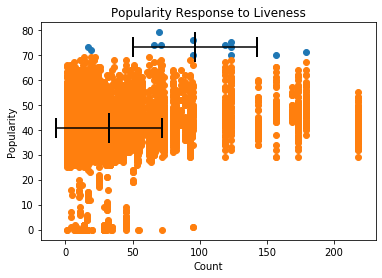

In [8]:
plt.scatter(pop.Count, pop.popularity)
plt.scatter(nonpop.Count, nonpop.popularity)
plt.xlabel("Count")
plt.ylabel("Popularity")
plt.title("Popularity Response to Liveness")

plt.errorbar(np.mean(pop.Count),np.mean(pop.popularity),xerr=np.std(pop.Count),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')
plt.errorbar(np.mean(nonpop.Count),np.mean(nonpop.popularity),xerr=np.std(nonpop.Count),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')

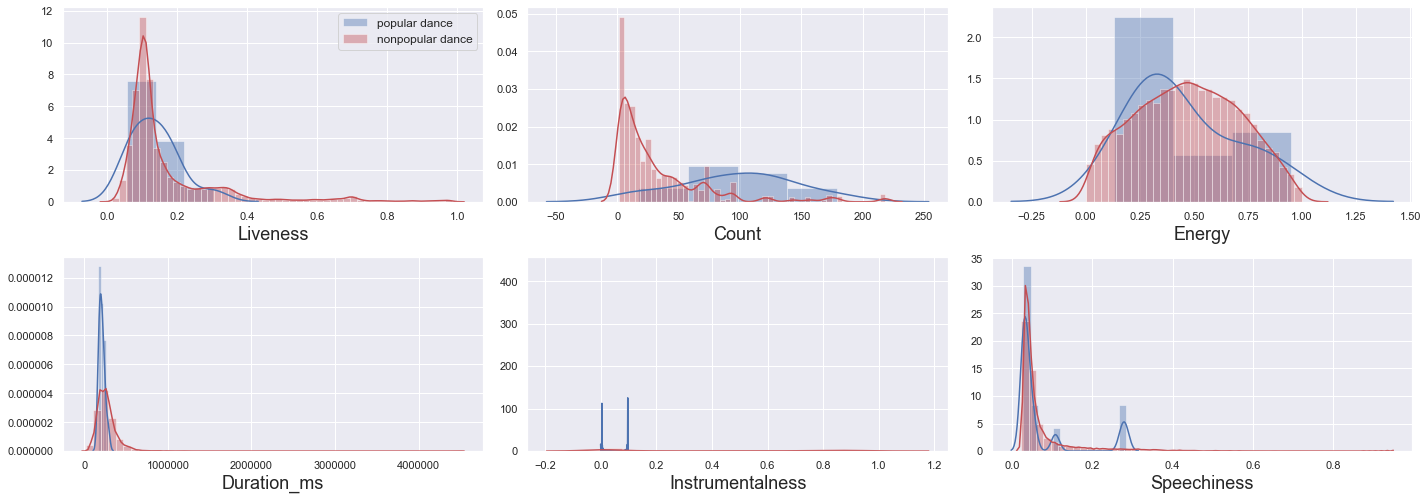

In [14]:
plt.figure(figsize=(20,10))
sns.set()

plt.subplot(331)
sns.distplot(pop.liveness, label='Popular Jazz')
sns.distplot(nonpop.liveness, color='r', label='Unpopular Jazz')
plt.xlabel('Liveness', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(pop.Count)
sns.distplot(nonpop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(333)
sns.distplot(pop.energy)
sns.distplot(nonpop.energy, color='r')
plt.xlabel('Energy', fontsize=18)

plt.subplot(334)
sns.distplot(pop.duration_ms)
sns.distplot(nonpop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(335)
sns.distplot(pop.instrumentalness)
sns.distplot(nonpop.instrumentalness, color='r')
plt.xlabel('Instrumentalness', fontsize=18)

plt.subplot(336)
sns.distplot(pop.speechiness)
sns.distplot(nonpop.speechiness, color='r')
plt.xlabel('Speechiness', fontsize=18)

plt.tight_layout()
plt.show()


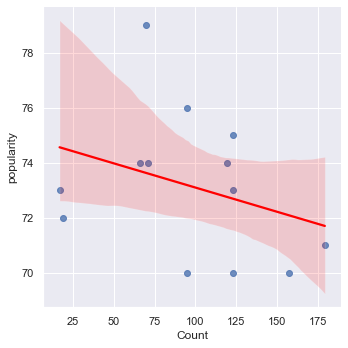

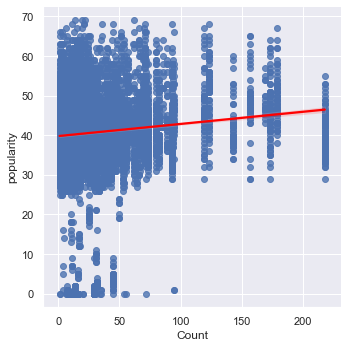

In [10]:
n = sns.lmplot(x='Count',y='popularity',data=pop,line_kws={'color': 'red'})
print(n)
p = sns.lmplot(x='Count',y='popularity',data=nonpop,line_kws={'color': 'red'})
print(p)


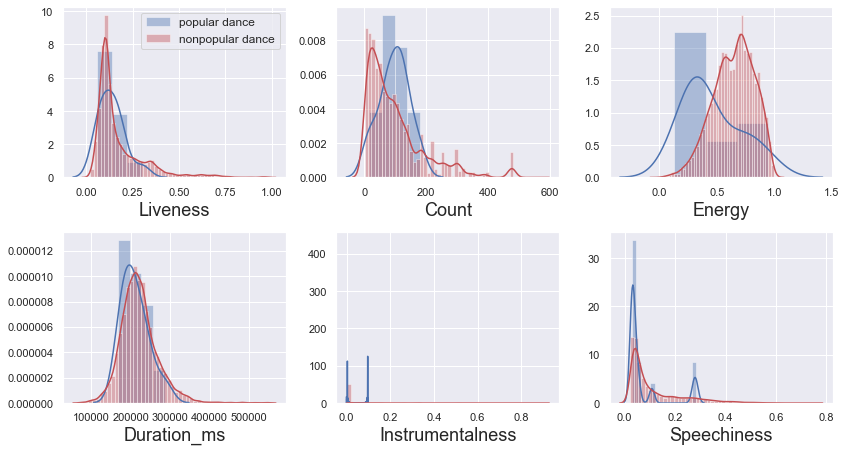

In [11]:
plt.figure(figsize=(20,10))
sns.set()

plt.subplot(331)
sns.distplot(pop.liveness, label='Popular Jazz')
sns.distplot(allpop.liveness, color='r', label='Other Music')
plt.xlabel('Liveness', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(pop.Count)
sns.distplot(allpop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(333)
sns.distplot(pop.energy)
sns.distplot(allpop.energy, color='r')
plt.xlabel('Energy', fontsize=18)

plt.subplot(334)
sns.distplot(pop.duration_ms)
sns.distplot(allpop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(335)
sns.distplot(pop.instrumentalness)
sns.distplot(allpop.instrumentalness, color='r')
plt.xlabel('Instrumentalness', fontsize=18)

plt.subplot(336)
sns.distplot(pop.speechiness)
sns.distplot(allpop.speechiness, color='r')
plt.xlabel('Speechiness', fontsize=18)

plt.tight_layout()
plt.show()


Sample size for this is small, however it looks like Energy will be interesting to look at.

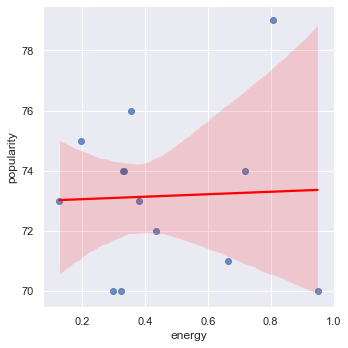

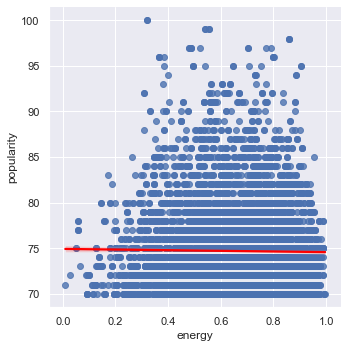

In [13]:
n = sns.lmplot(x='energy',y='popularity',data=pop,line_kws={'color': 'red'})
print(n)
p = sns.lmplot(x='energy',y='popularity',data=allpop,line_kws={'color': 'red'})
print(p)
